# Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#import TrainingCurves
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,auc,make_scorer,recall_score,roc_auc_score,precision_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score, RandomizedSearchCV

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint
import timeit

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Read datasets

In [2]:
#phishing = pd.read_csv('PhishingData.csv', names = ["SFH","popUpWindow", "SSLfinal_State", "Request_URL", "URL_of_Anchor", "web_traffic", "URL_Length", "age_of_domain", "having_IP_Address", "Result"])
phishing = pd.read_csv('Phishing.csv')

In [3]:
phishing.head()

having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                  1           1                   0                 0   
1                  0           1                   0                 0   
2                  0           0                   0                 0   
3                  0           0                   0                 0   
4                  0           0                   1                 0   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                         1             -1                 -1              -1   
1                         0             -1                  0               1   
2                         0             -1                 -1              -1   
3                         0             -1                 -1              -1   
4                         0             -1                  1               1   

   Domain_registeration_length  Favicon  ...  popUpWidnow  Iframe  \
0                            0        0  ...            0       0   
1                            0        0  ...            0       0   
2                            0        0  ...            0       0   
3                            1        0  ...            0       0   
4                            0        0  ...            1       0   

   age_of_domain  DNSRecord  web_traffic  Page_Rank  Google_Index  \
0             -1          1           -1         -1             0   
1             -1          1            0         -1             0   
2              0          1            1         -1             0   
3             -1          1            1         -1             0   
4             -1          1            0         -1             0   

   Links_pointing_to_page  Statistical_report  Result  
0                       1                   1       1  
1                       1                   0       1  
2                       0                   1       1  
3                      -1                   0       1  
4                       1                   0      -1  

[5 rows x 31 columns]

# Information about the datasets

In [4]:
phishing.describe()

having_IP_Address   URL_Length  Shortining_Service  having_At_Symbol  \
count        2456.000000  2456.000000         2456.000000       2456.000000   
mean            0.113192    -0.649837            0.122964          0.054560   
std             0.316892     0.752690            0.328463          0.227166   
min             0.000000    -1.000000            0.000000          0.000000   
25%             0.000000    -1.000000            0.000000          0.000000   
50%             0.000000    -1.000000            0.000000          0.000000   
75%             0.000000    -1.000000            0.000000          0.000000   
max             1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count               2456.000000    2456.000000        2456.000000   
mean                   0.125407      -0.254886          -0.185668   
std                    0.331247       0.676170           0.802068   
min                    0.000000      -1.000000          -1.000000   
25%                    0.000000      -1.000000          -1.000000   
50%                    0.000000       0.000000           0.000000   
75%                    0.000000       0.000000           0.000000   
max                    1.000000       1.000000           1.000000   

       SSLfinal_State  Domain_registeration_length      Favicon  ...  \
count     2456.000000                  2456.000000  2456.000000  ...   
mean         0.255700                     0.018730     0.189739  ...   
std          0.912332                     0.798455     0.392175  ...   
min         -1.000000                    -1.000000     0.000000  ...   
25%         -1.000000                    -1.000000     0.000000  ...   
50%          1.000000                     0.000000     0.000000  ...   
75%          1.000000                     1.000000     0.000000  ...   
max          1.000000                     1.000000     1.000000  ...   

       popUpWidnow       Iframe  age_of_domain    DNSRecord  web_traffic  \
count  2456.000000  2456.000000    2456.000000  2456.000000  2456.000000   
mean      0.196254     0.092020      -0.003257     0.536645     0.304560   
std       0.397244     0.289112       0.939726     0.498757     0.834146   
min       0.000000     0.000000      -1.000000     0.000000    -1.000000   
25%       0.000000     0.000000      -1.000000     0.000000     0.000000   
50%       0.000000     0.000000       0.000000     1.000000     1.000000   
75%       0.000000     0.000000       1.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

         Page_Rank  Google_Index  Links_pointing_to_page  Statistical_report  \
count  2456.000000   2456.000000             2456.000000         2456.000000   
mean     -0.540717      0.139658                0.344463            0.179153   
std       0.757832      0.346702                0.568911            0.383559   
min      -1.000000      0.000000               -1.000000            0.000000   
25%      -1.000000      0.000000                0.000000            0.000000   
50%      -1.000000      0.000000                0.000000            0.000000   
75%       0.000000      0.000000                1.000000            0.000000   
max       1.000000      1.000000                1.000000            1.000000   

            Result  
count  2456.000000  
mean     -0.109121  
std       0.994231  
min      -1.000000  
25%      -1.000000  
50%      -1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 31 columns]

In [5]:
phishing.describe().transpose()

count      mean       std  min  25%  50%  75%  \
having_IP_Address            2456.0  0.113192  0.316892  0.0  0.0  0.0  0.0   
URL_Length                   2456.0 -0.649837  0.752690 -1.0 -1.0 -1.0 -1.0   
Shortining_Service           2456.0  0.122964  0.328463  0.0  0.0  0.0  0.0   
having_At_Symbol             2456.0  0.054560  0.227166  0.0  0.0  0.0  0.0   
double_slash_redirecting     2456.0  0.125407  0.331247  0.0  0.0  0.0  0.0   
Prefix_Suffix                2456.0 -0.254886  0.676170 -1.0 -1.0  0.0  0.0   
having_Sub_Domain            2456.0 -0.185668  0.802068 -1.0 -1.0  0.0  0.0   
SSLfinal_State               2456.0  0.255700  0.912332 -1.0 -1.0  1.0  1.0   
Domain_registeration_length  2456.0  0.018730  0.798455 -1.0 -1.0  0.0  1.0   
Favicon                      2456.0  0.189739  0.392175  0.0  0.0  0.0  0.0   
port                         2456.0  0.135179  0.341984  0.0  0.0  0.0  0.0   
HTTPS_token                  2456.0  0.160423  0.367073  0.0  0.0  0.0  0.0   
Request_URL                  2456.0  0.195440  0.980915 -1.0 -1.0  1.0  1.0   
URL_of_Anchor                2456.0 -0.074104  0.710845 -1.0 -1.0  0.0  0.0   
Links_in_tags                2456.0 -0.084691  0.750393 -1.0 -1.0  0.0  0.0   
SFH                          2456.0 -0.677524  0.735650 -1.0 -1.0 -1.0 -1.0   
Submitting_to_email          2456.0  0.184853  0.388258  0.0  0.0  0.0  0.0   
Abnormal_URL                 2456.0  0.140879  0.347968  0.0  0.0  0.0  0.0   
Redirect                     2456.0  0.105863  0.307725  0.0  0.0  0.0  0.0   
on_mouseover                 2456.0  0.118078  0.322766  0.0  0.0  0.0  0.0   
RightClick                   2456.0  0.042345  0.201417  0.0  0.0  0.0  0.0   
popUpWidnow                  2456.0  0.196254  0.397244  0.0  0.0  0.0  0.0   
Iframe                       2456.0  0.092020  0.289112  0.0  0.0  0.0  0.0   
age_of_domain                2456.0 -0.003257  0.939726 -1.0 -1.0  0.0  1.0   
DNSRecord                    2456.0  0.536645  0.498757  0.0  0.0  1.0  1.0   
web_traffic                  2456.0  0.304560  0.834146 -1.0  0.0  1.0  1.0   
Page_Rank                    2456.0 -0.540717  0.757832 -1.0 -1.0 -1.0  0.0   
Google_Index                 2456.0  0.139658  0.346702  0.0  0.0  0.0  0.0   
Links_pointing_to_page       2456.0  0.344463  0.568911 -1.0  0.0  0.0  1.0   
Statistical_report           2456.0  0.179153  0.383559  0.0  0.0  0.0  0.0   
Result                       2456.0 -0.109121  0.994231 -1.0 -1.0 -1.0  1.0   

                             max  
having_IP_Address            1.0  
URL_Length                   1.0  
Shortining_Service           1.0  
having_At_Symbol             1.0  
double_slash_redirecting     1.0  
Prefix_Suffix                1.0  
having_Sub_Domain            1.0  
SSLfinal_State               1.0  
Domain_registeration_length  1.0  
Favicon                      1.0  
port                         1.0  
HTTPS_token                  1.0  
Request_URL                  1.0  
URL_of_Anchor                1.0  
Links_in_tags                1.0  
SFH                          1.0  
Submitting_to_email          1.0  
Abnormal_URL                 1.0  
Redirect                     1.0  
on_mouseover                 1.0  
RightClick                   1.0  
popUpWidnow                  1.0  
Iframe                       1.0  
age_of_domain                1.0  
DNSRecord                    1.0  
web_traffic                  1.0  
Page_Rank                    1.0  
Google_Index                 1.0  
Links_pointing_to_page       1.0  
Statistical_report           1.0  
Result                       1.0

In [6]:
#pd.to_numeric(phishing.SFH, errors = "coerce")
#pd.to_numeric(phishing.popUpWindow, errors = "coerce")
#pd.to_numeric(phishing.SSLfinal_State, errors = "coerce")
#pd.to_numeric(phishing.Request_URL, errors = "coerce")
#pd.to_numeric(phishing.URL_of_Anchor, errors = "coerce")
#pd.to_numeric(phishing.web_traffic, errors = "coerce")
#pd.to_numeric(phishing.URL_Length, errors = "coerce")
#pd.to_numeric(phishing.age_of_domain, errors = "coerce")
#pd.to_numeric(phishing.having_IP_Address, errors = "coerce")
#pd.to_numeric(phishing.Result, errors = "coerce")
#inplace = True
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [7]:
phishing.Result.unique()

array([ 1, -1])

#### I have 1353 data points with 9 numeric features, 
#### the values of the features are -1, 0, 1 respectively. 

## Check the distribution of the result

In [8]:
phishing['Result'].value_counts()*100.0/len(phishing)

-1    55.456026
 1    44.543974
Name: Result, dtype: float64

<AxesSubplot:title={'center':'Count (Result)'}>

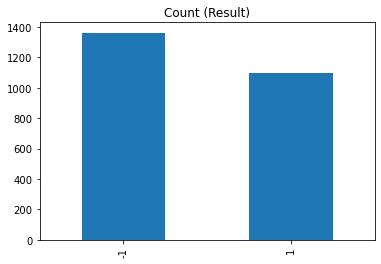

In [9]:
phishing['Result'].value_counts().plot(kind='bar',title='Count (Result)')

#### It looks that this dataset is not balanced
#### I will make the dataset balance by applying over-sampling

# Variables Selection

In [10]:
#correlation = phishing.corr()
correlation_result = abs(phishing.corr()['Result'])
print(correlation_result)

having_IP_Address              0.061623
URL_Length                     0.055605
Shortining_Service             0.061175
having_At_Symbol               0.008336
double_slash_redirecting       0.042536
Prefix_Suffix                  0.537020
having_Sub_Domain              0.266514
SSLfinal_State                 0.712876
Domain_registeration_length    0.260157
Favicon                        0.005067
port                           0.038609
HTTPS_token                    0.039071
Request_URL                    0.243759
URL_of_Anchor                  0.699608
Links_in_tags                  0.204575
SFH                            0.067708
Submitting_to_email            0.012178
Abnormal_URL                   0.052093
Redirect                       0.052760
on_mouseover                   0.042706
RightClick                     0.006811
popUpWidnow                    0.002677
Iframe                         0.007565
age_of_domain                  0.300330
DNSRecord                      0.183854


#### It looks that some features are not very relevant
#### Therefore, I will try to drop these features 
#### and only keep features with  correlation > 0.15

##  Create a list for predictors

In [11]:
s_features = correlation_result[correlation_result > 0.15]
print(s_features)

Prefix_Suffix                  0.537020
having_Sub_Domain              0.266514
SSLfinal_State                 0.712876
Domain_registeration_length    0.260157
Request_URL                    0.243759
URL_of_Anchor                  0.699608
Links_in_tags                  0.204575
age_of_domain                  0.300330
DNSRecord                      0.183854
web_traffic                    0.535545
Page_Rank                      0.350812
Google_Index                   0.151763
Result                         1.000000
Name: Result, dtype: float64


In [12]:
p_list = ['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 
          'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'age_of_domain',
          'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index']

## Prepare training and testing datasets

In [13]:
count_n1, count_1 = phishing['Result'].value_counts()
#print(count_n1, count_1)
# divide by class
class_n1 = phishing[phishing['Result'] == -1]
class_1 = phishing[phishing['Result'] == 1]


In [14]:
class_1_over = class_1.sample(count_n1, replace=True, random_state = 7)
#class_0_over = class_0.sample(count_n1, replace=True)

data_over = pd.concat([class_n1, class_1_over], axis=0)
#test_0_over = pd.concat([class_n1, class_0_over], axis=0)

print('Random over-sampling:')
print(data_over.Result.value_counts())

Random over-sampling:
-1    1362
 1    1362
Name: Result, dtype: int64


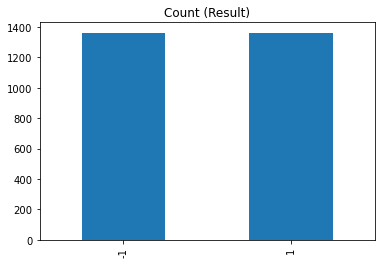

In [15]:
data_over.Result.value_counts().plot(kind='bar', title='Count (Result)');

In [16]:
data_over['Result'].value_counts()*100.0/len(data_over)

-1    50.0
 1    50.0
Name: Result, dtype: float64

In [17]:
data_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 4 to 763
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2724 non-null   int64
 1   URL_Length                   2724 non-null   int64
 2   Shortining_Service           2724 non-null   int64
 3   having_At_Symbol             2724 non-null   int64
 4   double_slash_redirecting     2724 non-null   int64
 5   Prefix_Suffix                2724 non-null   int64
 6   having_Sub_Domain            2724 non-null   int64
 7   SSLfinal_State               2724 non-null   int64
 8   Domain_registeration_length  2724 non-null   int64
 9   Favicon                      2724 non-null   int64
 10  port                         2724 non-null   int64
 11  HTTPS_token                  2724 non-null   int64
 12  Request_URL                  2724 non-null   int64
 13  URL_of_Anchor                2724 non-null   int6

In [18]:
data_over.shape

(2724, 31)

#### Now I have a balanced dataset

In [19]:
traindata = pd.DataFrame(data_over,dtype=np.float)

<ipython-input-19-52bbba493811>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  traindata = pd.DataFrame(data_over,dtype=np.float)


In [20]:
# I have 2106 datapoints with 9 features
# divide the dataset into training set and testing set using SciKit-Learn

X = data_over.drop('Result', axis=1)
y = data_over['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [21]:
# scale the dataset before training 

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree 

In [22]:
DT_classifier = DecisionTreeClassifier(random_state=7)
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

In [76]:
#training accuracy & f1 & balanced accuracy & recall & precision
DT_train_predict = DT_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, DT_train_predict)
f1_train_predict = f1_score(y_train, DT_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, DT_train_predict)
recall_train_predict = recall_score(y_train, DT_train_predict)
precision_train_predict = precision_score(y_train, DT_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict,'\n')

print("Training f1_CV")
CVscores_train = cross_val_score(DT_classifier, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(DT_classifier, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())


Training set 
training accuracy 0.9967875172097292 
training f1 0.9967873845923783 
balanced accuracy 0.996798063588831 
recall score 0.9954462659380692 
precision score 0.9981735159817352 

Training f1_CV
[0.97247475 0.99082569 0.97247475 0.96788383 0.96788923 0.97243995
 0.94953173 0.98623593 0.9908226  0.97234964] 
 ave_f1_cv: 0.9742928085037026 

Training precision_CV
[0.96396396 1.         0.97272727 0.96396396 0.97247706 0.94827586
 0.94594595 0.98198198 0.98214286 0.97247706] 
 ave_precision_cv: 0.9703955976235319


In [40]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, DT_train_predict))
print(conf_matrix_train)

      0     1
0  1079     2
1     5  1093


## Try hyerparameters manually

### max_depth

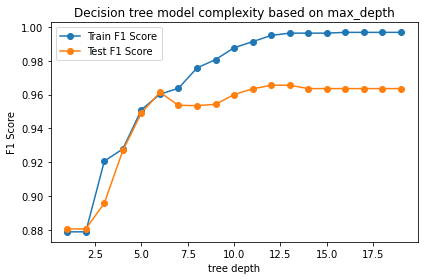

In [36]:
f1_score_test = []
f1_score_train = []
tree_depth = list(range(1,20))
for sp in tree_depth:         
        model = DecisionTreeClassifier(max_depth=sp, min_samples_leaf=1, criterion='gini', random_state=7)
        #model = DecisionTreeClassifier(random_state=7)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        f1_score_train.append(f1_score(y_train, y_pred_train))
        f1_score_test.append(f1_score(y_test, y_pred_test))
        
# plotting model complexity 
plt.plot(tree_depth, f1_score_train,'o-', label='Train F1 Score')
plt.plot(tree_depth, f1_score_test, 'o-', label='Test F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('tree depth')
plt.title('Decision tree model complexity based on max_depth')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
DT_classifier_1 = DecisionTreeClassifier(max_depth=7,random_state=7)
DT_classifier_1.fit(X_train,y_train)
#training accuracy & f1
DT_train_1_predict = DT_classifier_1.predict(X_train)
accuracy_train_1_predict = accuracy_score(y_train, DT_train_1_predict)
f1_train_1_predict = f1_score(y_train, DT_train_1_predict,average='macro')
print('training accuracy', accuracy_train_1_predict, 'training f1',  f1_train_1_predict)
CVscores_train_1 = cross_val_score(DT_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=10)
CVscores_train_1, CVscores_train_1.mean()


training accuracy 0.9628269848554383 training f1 0.9628041410921735


(array([0.91279816, 0.94953173, 0.95403171, 0.94951473, 0.93577441,
        0.94472617, 0.9448799 , 0.94483806, 0.95871473, 0.93541667]),
 0.9430226258438564)

### minimum samples leaf

In [33]:
def dt_hp_search(X_train, y_train):
    param_space = {'min_samples_leaf':np.linspace(round(0.005*len(X_train)), round(0.05*len(X_train)),20).round().astype('int')}

    model_dt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=7), param_grid=param_space, cv=10)
    model_dt.fit(X_train, y_train)
    print("best parameter:")
    print(model_dt.best_params_)
    return model_dt.best_params_['min_samples_leaf']

In [34]:
min_leaf = dt_hp_search(X_train,y_train)
model_dt = DecisionTreeClassifier(min_samples_leaf=min_leaf, criterion='gini', random_state=7)

best parameter:
{'min_samples_leaf': 11}


In [38]:
DT_classifier_try = DecisionTreeClassifier(min_samples_leaf = 11, max_depth=7
                                         , random_state=7)
DT_classifier_try.fit(X_train,y_train)
#training accuracy & f1
DT_train_try_predict = DT_classifier_try.predict(X_train)
accuracy_train_try_predict = accuracy_score(y_train, DT_train_try_predict)
f1_train_try_predict = f1_score(y_train, DT_train_try_predict,average='macro')
print('training accuracy', accuracy_train_try_predict, 'training f1',  f1_train_try_predict)
CVscores_train_try = cross_val_score(DT_classifier_try, X_train, y_train,
                         scoring="f1_macro", cv=10)
CVscores_train_try, CVscores_train_try.mean()

training accuracy 0.9564020192748968 training f1 0.9563771761626203


(array([0.95864511, 0.96785677, 0.9494892 , 0.94493559, 0.92201671,
        0.9356444 , 0.94951473, 0.94953173, 0.94036572, 0.95383764]),
 0.9471837595251944)

### Grid Search

In [36]:
def DT_grid_search(X, y, verbose = 0):
    param_grid = {'criterion':['gini', 'entropy', 'rbf'], 
                 'max_depth': np.arange(1,20),
                 'class_weight':['balanced', None],
                 'min_samples_leaf':np.linspace(1,15,15).astype('int32'),
                  #'splitter':'best',
                 }
    scoring = {'recall':make_scorer(recall_score), 
               'precision':make_scorer(precision_score), 
               'bal_ac': make_scorer(balanced_accuracy_score),
                'f1':make_scorer(f1_score)},
    refit='f1',
    base_estimator = DecisionTreeClassifier(random_state = 7)
    DT_gs = GridSearchCV(base_estimator, param_grid, cv = 10
                        ,scoring="balanced_accuracy")#, 
                         #verbose = verbose, scoring="balanced_accuracy")
    DT_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return DT_gs

res = DT_grid_search(X_train, y_train)
print('best parameters:', res.best_params_, 'best score:', res.best_score_)

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1} best score: 0.9774961387576064


In [22]:
DT_classifier_1 = DecisionTreeClassifier(criterion = 'gini', max_depth=12, min_samples_leaf = 1, random_state = 7)
DT_classifier_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=7)

In [23]:
print('Cross Validation Score:' 
     )
print("Training f1_CV")
CVscores_train = cross_val_score(DT_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(DT_classifier_1, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')


#testing accuracy & f1 & balanced accuracy & recall & precision
DT_test_predict_1 = DT_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, DT_test_predict_1)
f1_test_predict = f1_score(y_test, DT_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, DT_test_predict_1)
recall_test_predict = recall_score(y_test, DT_test_predict_1)
precision_test_predict = precision_score(y_test, DT_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)



Cross Validation Score:
Training f1_CV
[0.96788383 0.98623824 0.98623824 0.96329966 0.97247706 0.97243995
 0.96787301 0.99082492 0.9908226  0.97234964] 
 ave_f1_cv: 0.9770447153379642 

Training precision_CV
[0.95535714 0.99082569 0.99082569 0.96363636 0.98148148 0.94827586
 0.95575221 0.99090909 0.98214286 0.97247706] 
 ave_precision_cv: 0.9731683450852255 

Testing set 
testing accuracy 0.9669724770642202 
testing f1 0.96691355026712 
balanced accuracy 0.9665965706890973 
recall score 0.9545454545454546 
precision score 0.9767441860465116


In [79]:
DT_classifier_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=15, min_samples_leaf = 1, random_state = 7)
DT_classifier_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=7)

In [80]:
print('\n','Cross Validation Score:', 
     )

print("Training f1_CV")
CVscores_train = cross_val_score(DT_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(DT_classifier_2, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
DT_test_predict_2 = DT_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, DT_test_predict_2)
f1_test_predict = f1_score(y_test, DT_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, DT_test_predict_2)
recall_test_predict = recall_score(y_test, DT_test_predict_2)
precision_test_predict = precision_score(y_test, DT_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)




 Cross Validation Score:
Training f1_CV
[0.96788383 0.98164983 0.97705988 0.96788383 0.96330275 0.97704055
 0.97247475 0.9816452  0.98164983 0.97695853] 
 ave_f1_cv: 0.9747548960817746 

Training precision_CV
[0.95535714 1.         0.97297297 0.96396396 0.97222222 0.95652174
 0.97272727 0.97321429 0.98181818 0.98148148] 
 ave_precision_cv: 0.9730279262887958 

Testing set 
testing accuracy 0.963302752293578 
testing f1 0.9632372780745777 
balanced accuracy 0.9629232718645531 
recall score 0.9507575757575758 
precision score 0.9728682170542635


In [24]:
best_accuracy = np.zeros(5)
best_f1 = np.zeros(5)
best_precision = np.zeros(5)
best_accuracy[0] = accuracy_score(y_test, DT_test_predict_1)
best_f1[0] = f1_score(y_test, DT_test_predict_1)
best_precision[0] = precision_score(y_test, DT_test_predict_1)
print(best_accuracy, "\n",best_f1,"\n",best_precision)

[0.96697248 0.         0.         0.         0.        ] 
 [0.96551724 0.         0.         0.         0.        ] 
 [0.97674419 0.         0.         0.         0.        ]


## Decision Tree Learning Curve

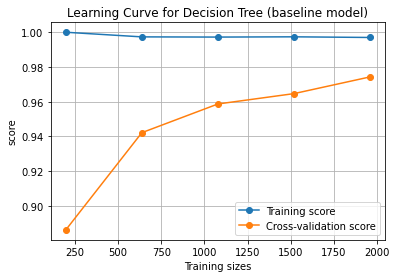

In [46]:
#Accuracy
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=DT_classifier, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=10, n_jobs=1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

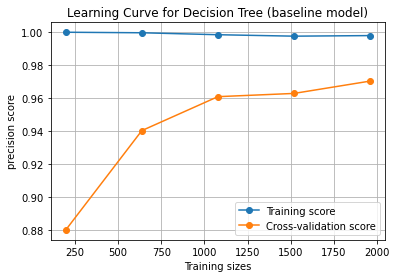

In [81]:
#precision
scorer = make_scorer(precision_score)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=DT_classifier, X=X_train, y=y_train,scoring = scorer, 
                                              train_sizes = train_sizes, cv=10, n_jobs=1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

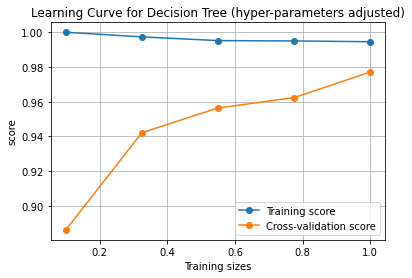

In [48]:
#Accuracy
DT_train_sizes = np.linspace(0.1, 1.0, 5)
DT_train_size, DT_train_scores, DT_test_scores = learning_curve(DT_classifier_1, X_train, y_train,
                                             train_sizes = train_sizes, cv=10, n_jobs=-1,random_state=7)
plt.figure()
plt.plot(DT_train_sizes, np.mean(DT_train_scores, axis=1), 'o-', label='Training score')
plt.plot(DT_train_sizes, np.mean(DT_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

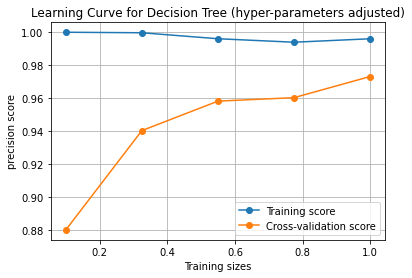

In [82]:
#precision
scorer = make_scorer(precision_score)
DT_train_sizes = np.linspace(0.1, 1.0, 5)
DT_train_size, DT_train_scores, DT_test_scores = learning_curve(DT_classifier_1, X_train, y_train,scoring = scorer,
                                             train_sizes = train_sizes, cv=10, n_jobs=-1,random_state=7)
plt.figure()
plt.plot(DT_train_sizes, np.mean(DT_train_scores, axis=1), 'o-', label='Training score')
plt.plot(DT_train_sizes, np.mean(DT_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [29]:
#time
model_DT = DecisionTreeClassifier(criterion = 'gini', max_depth=12, 
                                  min_samples_leaf = 1, random_state = 7)

start_time = timeit.default_timer()
model_DT.fit(X_train, y_train)
end_time = timeit.default_timer()

print(f"training_time to fit the model: {end_time - start_time}")    
start_time = timeit.default_timer()    
preds = model_DT.predict(X_test)

print(f"Time to score the test data: {end_time - start_time}")

#model_DT_train,model_DT_fit_time, model_DT_pred_time = learning_curve(model_DT, X_train, y_train)
#plt.figure()
#plt.title("Time taken by classifier: " + title)
#plt.xlabel("Training size")
#plt.ylabel("Time  in (s)")
#plt.fill_between(data_size_list, fit_mean - 2 * fit_std, fit_mean + 2 * fit_std, alpha=0.1)
#plt.fill_between(data_size_list, pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, alpha=0.1)
#plt.plot(data_size_list, fit_mean, 'o-',  label="Training Time  in (s)")
#plt.plot(data_size_list, pred_std, 'o-', label="Prediction Time in (s)")
#plt.legend(loc="best")
#plt.show()


training_time to fit the model: 0.004330999999979213
Time to score the test data: -0.0002312999999958265


## Decision Tree Validation Curve

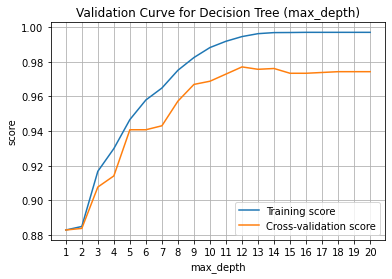

In [51]:
#Accuracy
depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(DT_classifier_1, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=10)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (max_depth)')
plt.xlabel('max_depth')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

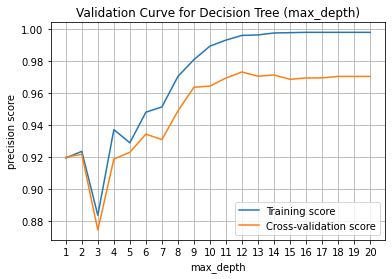

In [83]:
#precision
scorer = make_scorer(precision_score)
depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(DT_classifier_1, X_train, y_train, 
                                             param_name="max_depth", param_range=depth_range, 
                                             scoring = scorer,cv=10)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (max_depth)')
plt.xlabel('max_depth')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

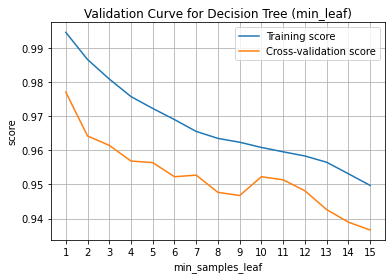

In [55]:
leaf_range = np.arange(15) + 1
train_scores, test_scores = validation_curve(DT_classifier_1, X_train, y_train, param_name="min_samples_leaf", param_range=leaf_range, cv=10)

plt.figure()
plt.xticks(leaf_range)
plt.plot(leaf_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(leaf_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (min_leaf)')
plt.xlabel('min_samples_leaf')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

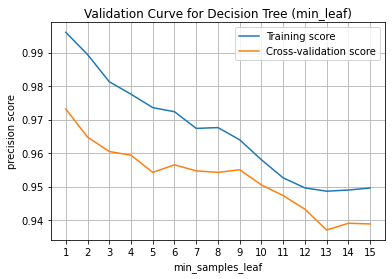

In [84]:
#precision
scorer = make_scorer(precision_score)
leaf_range = np.arange(15) + 1
train_scores, test_scores = validation_curve(DT_classifier_1, X_train, y_train, 
                                             param_name="min_samples_leaf", param_range=leaf_range, 
                                             scoring = scorer,cv=10)

plt.figure()
plt.xticks(leaf_range)
plt.plot(leaf_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(leaf_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (min_leaf)')
plt.xlabel('min_samples_leaf')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

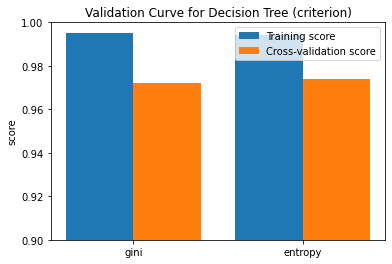

In [25]:
# Validation graph for criterion (accuracy)

criterion = ['gini', 'entropy']
scorer = make_scorer(recall_score)
train_scores, test_scores = validation_curve(DT_classifier_1,X_train, y_train, 
                                             param_name="criterion", param_range=criterion, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

#x = ['gini(Train)','gini(CV)','entropy(Train)','entropy(CV)']
x = ['gini','entropy']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend()
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('score')
plt.title('Validation Curve for Decision Tree (criterion)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

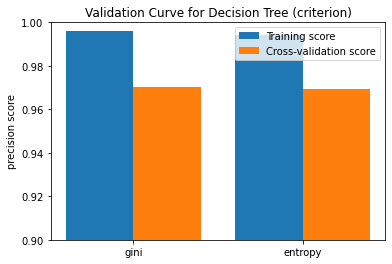

In [85]:
# Validation graph for criterion (precision)
criterion = ['gini', 'entropy']
scorer = make_scorer(precision_score)
train_scores, test_scores = validation_curve(DT_classifier_1,X_train, y_train, 
                                             param_name="criterion", param_range=criterion, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

#x = ['gini(Train)','gini(CV)','entropy(Train)','entropy(CV)']
x = ['gini','entropy']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend()
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('precision score')
plt.title('Validation Curve for Decision Tree (criterion)')
plt.show



## Neural Network

In [86]:
#train the training set
NN_classifier = MLPClassifier(random_state=7)
NN_classifier.fit(X_train,y_train)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=7)

In [87]:
#training accuracy & f1 & balanced accuracy & recall & precision
NN_train_predict = NN_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, NN_train_predict)
f1_train_predict = f1_score(y_train, NN_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, NN_train_predict)
recall_train_predict = recall_score(y_train, NN_train_predict)
precision_train_predict = precision_score(y_train, NN_train_predict)


print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict)

print("Training f1_CV")
CVscores_train = cross_val_score(NN_classifier, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())



Training set 
training accuracy 0.992198256080771 
training f1 0.9921977236638158 
balanced accuracy 0.9921942005395396 
recall score 0.9927140255009107 
precision score 0.991810737033667
Training f1_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

[0.97705988 0.97705988 0.97705988 0.9816452  0.96329966 0.96325327
 0.96788923 0.97247475 0.98623593 0.97234964] 
 ave_f1_cv: 0.9738327302067603 

Training precision_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

[0.96428571 0.97297297 0.97297297 0.97321429 0.96363636 0.93965517
 0.98130841 0.97272727 0.98198198 0.97247706] 
 ave_precision_cv: 0.9695232212140494


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
NNconf_matrix_train = pd.DataFrame(confusion_matrix(y_train, NN_train_predict))
print(NNconf_matrix_train)

      0     1
0  1072     9
1     8  1090


In [133]:
def NN_grid_search(X, y, verbose = 0):
    param_grid = {'hidden_layer_sizes':[(10, 10),(10, 10, 10),(20, 20, 20)], 
                 'max_iter': [500, 1000, 1200],
                 'learning_rate_init':[0.001, 0.005, 0.010, 0.05, 0.1],
                 'activation':['logistic', 'tanh', 'relu'],
                 'learning_rate': ['constant','invscaling','adaptive'],
                  #'splitter':'best',
                 }
    
    base_estimator = MLPClassifier(random_state = 7)
    NN_gs = GridSearchCV(base_estimator, param_grid, cv = 10,
                        scoring="balanced_accuracy")#, 
                         #verbose = verbose, )
    NN_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return NN_gs

NNres = NN_grid_search(X_train, y_train)
print('best parameters:', NNres.best_params_, 'best score:', NNres.best_score_)

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_mu

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

best parameters: {'activation': 'relu', 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500} best score: 0.9719574182188863


In [31]:
def NN_grid_search(X, y):
    param_grid = {'hidden_layer_sizes':[(5,),(10,),(20,),(40,), (80,),(150,)], 
                 'max_iter': [500, 1000, 1200],
                 'learning_rate_init':[0.001, 0.005, 0.010, 0.05, 0.1],
                 'activation':['logistic', 'tanh', 'relu']
                 }
    
    base_estimator = MLPClassifier(random_state = 7)
    NN_gs = GridSearchCV(base_estimator, param_grid, cv = 10)
    NN_gs.fit(X,y)

    return NN_gs

NNres = NN_grid_search(X_train, y_train)
print('best parameters:', NNres.best_params_, 'best score:', NNres.best_score_)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (80,), 'learning_rate_init': 0.05, 'max_iter': 500} best score: 0.9761319917135246


In [60]:
def NN_grid_search(X, y):
    param_grid = {'hidden_layer_sizes':[(70,),(80,),(90,),(100,), (110,),(120,)], 
                 'max_iter': [500, 1000, 1200],
                 'learning_rate_init':[0.001, 0.005, 0.010, 0.05, 0.1],
                 'activation':['logistic', 'tanh', 'relu']
                 }
    
    base_estimator = MLPClassifier(random_state = 7)
    NN_gs = GridSearchCV(base_estimator, param_grid, cv = 10)
    NN_gs.fit(X,y)

    return NN_gs

NNres = NN_grid_search(X_train, y_train)
print('best parameters:', NNres.best_params_, 'best score:', NNres.best_score_)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neur

best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (110,), 'learning_rate_init': 0.1, 'max_iter': 500} best score: 0.9775039107090009


In [88]:
NN_classifier_1 = MLPClassifier(activation='relu', hidden_layer_sizes = (10, 10, 10), learning_rate_init = 0.005, max_iter = 500,
                               random_state=7)
NN_classifier_1.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.005,
              max_iter=500, random_state=7)

In [89]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(NN_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier_1, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
NN_test_predict_1 = NN_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, NN_test_predict_1)
f1_test_predict = f1_score(y_test, NN_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, NN_test_predict_1)
recall_test_predict = recall_score(y_test, NN_test_predict_1)
precision_test_predict = precision_score(y_test, NN_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)


Cross Validation Score:
Training f1_CV
[0.97246779 0.98165138 0.9494892  0.98164983 0.96788383 0.94941248
 0.97706374 0.98623129 0.96787301 0.97234964] 
 ave_f1_cv: 0.9706072195853477 

Training precision_CV
[0.95575221 0.99074074 0.93043478 0.98181818 0.96396396 0.91596639
 0.98165138 0.97345133 0.95575221 0.97247706] 
 ave_precision_cv: 0.9622008248265568 

Testing set 
testing accuracy 0.963302752293578 
testing f1 0.9632481860113828 
balanced accuracy 0.9630378518278875 
recall score 0.9545454545454546 
precision score 0.9692307692307692


In [90]:
NN_classifier_2 = MLPClassifier(activation='relu', hidden_layer_sizes = (20, 20, 20), learning_rate_init = 0.001, max_iter = 500,
                               learning_rate = 'constant', random_state=7)
NN_classifier_2.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=500, random_state=7)

In [91]:
print('Cross Validation Score:'
     )
CVscores_train = cross_val_score(NN_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier_2, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
NN_test_predict_2 = NN_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, NN_test_predict_2)
f1_test_predict = f1_score(y_test, NN_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, NN_test_predict_2)
recall_test_predict = recall_score(y_test, NN_test_predict_2)
precision_test_predict = precision_score(y_test, NN_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
[0.98164983 0.97706374 0.97246779 0.98164983 0.96329966 0.96327493
 0.95409367 0.97705215 0.96788923 0.97695853] 
 ave_f1_cv: 0.9715399363832458 

Training precision_CV
[0.97297297 0.98165138 0.96428571 0.98181818 0.96363636 0.94736842
 0.93859649 0.96460177 0.97247706 0.98148148] 
 ave_precision_cv: 0.9668889836753893 

Testing set 
testing accuracy 0.9541284403669725 
testing f1 0.9540535710070446 
balanced accuracy 0.9537973147848593 
recall score 0.9431818181818182 
precision score 0.9613899613899614


In [92]:
NN_classifier_3 = MLPClassifier(activation='logistic', hidden_layer_sizes = (80,), learning_rate_init = 0.05, max_iter = 500,
                               learning_rate = 'constant', random_state=7)
NN_classifier_3.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(80,),
              learning_rate_init=0.05, max_iter=500, random_state=7)

In [93]:
print('Cross Validation Score:'
     )
CVscores_train = cross_val_score(NN_classifier_3, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier_3, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
NN_test_predict_3 = NN_classifier_3.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, NN_test_predict_3)
f1_test_predict = f1_score(y_test, NN_test_predict_3,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, NN_test_predict_3)
recall_test_predict = recall_score(y_test, NN_test_predict_3)
precision_test_predict = precision_score(y_test, NN_test_predict_3)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
[0.98164983 0.98623824 0.96788383 0.9816452  0.96329966 0.96325327
 0.95412458 0.98623593 0.98164983 0.96313286] 
 ave_f1_cv: 0.9729113220051342 

Training precision_CV
[0.97297297 0.99082569 0.96396396 0.97321429 0.96363636 0.93965517
 0.95454545 0.98198198 0.98181818 0.96330275] 
 ave_precision_cv: 0.968591681741397 

Testing set 
testing accuracy 0.9669724770642202 
testing f1 0.96691355026712 
balanced accuracy 0.9665965706890973 
recall score 0.9545454545454546 
precision score 0.9767441860465116


In [25]:
NN_classifier_4 = MLPClassifier(activation='logistic', hidden_layer_sizes = (110,), 
                                learning_rate_init = 0.1, max_iter = 500,
                                random_state=7)
NN_classifier_4.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(110,),
              learning_rate_init=0.1, max_iter=500, random_state=7)

In [26]:
print('Cross Validation Score:'
     )
CVscores_train = cross_val_score(NN_classifier_4, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier_4, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
NN_test_predict_4 = NN_classifier_4.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, NN_test_predict_4)
f1_test_predict = f1_score(y_test, NN_test_predict_4,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, NN_test_predict_4)
recall_test_predict = recall_score(y_test, NN_test_predict_4)
precision_test_predict = precision_score(y_test, NN_test_predict_4)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
[0.98623824 0.98623824 0.97705215 0.97705215 0.96788383 0.9724562
 0.97705988 0.9908226  0.9816452  0.95852535] 
 ave_f1_cv: 0.9774973823972536 

Training precision_CV
[0.98181818 0.99082569 0.96460177 0.96460177 0.96396396 0.95614035
 0.97297297 0.98214286 0.97321429 0.96296296] 
 ave_precision_cv: 0.9713244803348822 

Testing set 
testing accuracy 0.9596330275229358 
testing f1 0.9595730046125213 
balanced accuracy 0.959364553003343 
recall score 0.9507575757575758 
precision score 0.9653846153846154


In [27]:
best_accuracy[1] = accuracy_score(y_test, NN_test_predict_4)
best_f1[1] = f1_score(y_test, NN_test_predict_4)
best_precision[1] = precision_score(y_test, NN_test_predict_4)
print(best_accuracy, "\n",best_f1, "\n",best_precision)

[0.96697248 0.95963303 0.         0.         0.        ] 
 [0.96551724 0.95801527 0.         0.         0.        ] 
 [0.97674419 0.96538462 0.         0.         0.        ]


## Neural Network Learning Curve

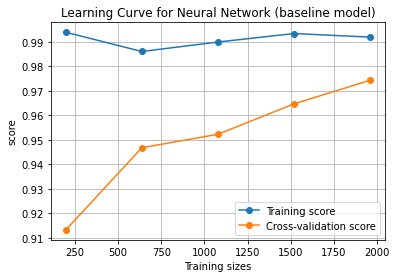

In [69]:
#Accuracy
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier, X=X_train, y=y_train,
                                                        train_sizes = train_sizes, cv=10, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

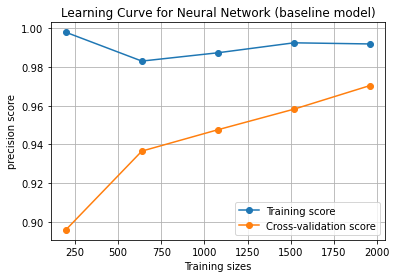

In [98]:
#precision
scorer = make_scorer(precision_score)
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier, X=X_train, y=y_train,scoring = scorer,
                                                        train_sizes = train_sizes, cv=10, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

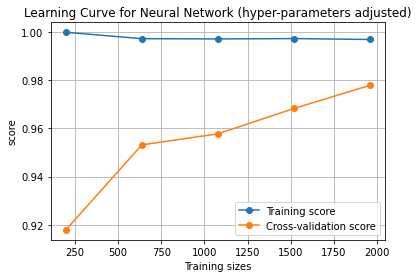

In [64]:
#Accuracy
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier_4, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

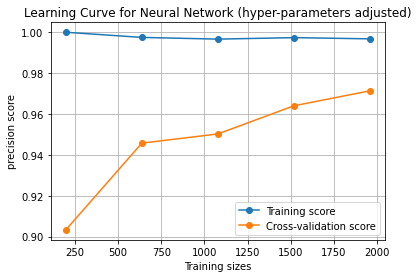

In [99]:
#precision
scorer = make_scorer(precision_score)
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier_4, X=X_train, y=y_train, scoring = scorer, 
                                              train_sizes = train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [31]:
#time
model_NN = MLPClassifier(activation='logistic', hidden_layer_sizes = (110,), 
                                learning_rate_init = 0.1, max_iter = 500,
                                random_state=7)

start_time = timeit.default_timer()
model_NN.fit(X_train, y_train)
end_time = timeit.default_timer()

print(f"training_time to fit the model: {end_time - start_time}")    
start_time = timeit.default_timer()    
preds = model_NN.predict(X_test)

print(f"Time to score the test data: {end_time - start_time}")
model_NN_train,model_NN_fit_time, model_NN_pred_time = learning_curve(model_NN, X_train, y_train)

training_time to fit the model: 0.8700521999999182
Time to score the test data: -0.000559100000032231


## Neural Network Validation Curve

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

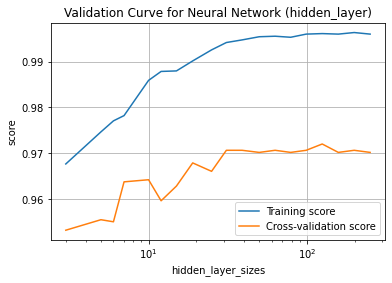

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

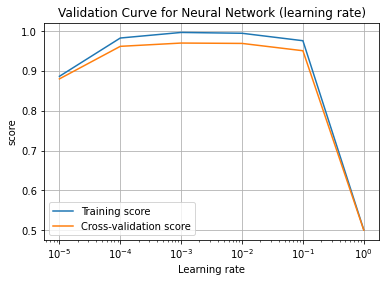

In [30]:
arr = np.logspace(0.5, 2.4, num=20)
variable_layers_size = arr.astype('int32')
range_list = [(v,) for v in variable_layers_size]

train_scores, test_scores = validation_curve(NN_classifier_2, 
                                             X_train, y_train, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=range_list, cv=5)

plt.figure()
plt.semilogx(range_list, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(range_list, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (hidden_layer)')
plt.xlabel('hidden_layer_sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Learning rate
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(NN_classifier_2, 
                                             X_train, y_train, 
                                             param_name="learning_rate_init", 
                                             param_range=lr_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (learning rate)')
plt.xlabel('Learning rate')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

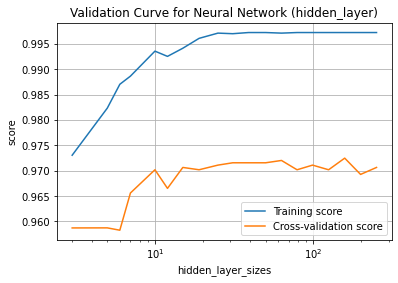

In [66]:
arr = np.logspace(0.5, 2.4, num=20)
variable_layers_size = arr.astype('int32')
range_list = [(v,) for v in variable_layers_size]

train_scores, test_scores = validation_curve(NN_classifier_4, 
                                             X_train, y_train, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=range_list, cv=5)

plt.figure()
plt.semilogx(range_list, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(range_list, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (hidden_layer)')
plt.xlabel('hidden_layer_sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()


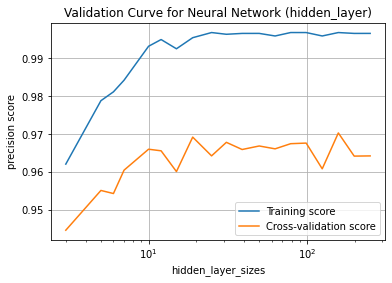

In [100]:
# precision
scorer = make_scorer(precision_score)
arr = np.logspace(0.5, 2.4, num=20)
variable_layers_size = arr.astype('int32')
range_list = [(v,) for v in variable_layers_size]

train_scores, test_scores = validation_curve(NN_classifier_4, 
                                             X_train, y_train,scoring = scorer,
                                             param_name="hidden_layer_sizes", 
                                             param_range=range_list, cv=5)

plt.figure()
plt.semilogx(range_list, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(range_list, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (hidden_layer)')
plt.xlabel('hidden_layer_sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

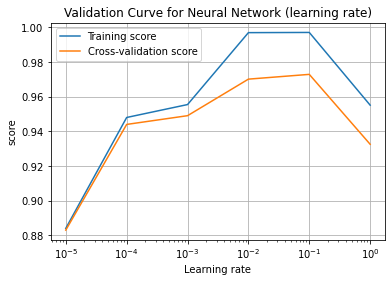

In [67]:
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(NN_classifier_4, 
                                             X_train, y_train, 
                                             param_name="learning_rate_init", 
                                             param_range=lr_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (learning rate)')
plt.xlabel('Learning rate')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

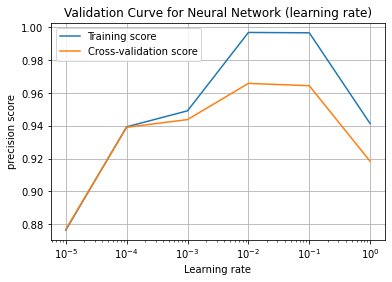

In [101]:
#precision
scorer = make_scorer(precision_score)
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(NN_classifier_4, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="learning_rate_init", 
                                             param_range=lr_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (learning rate)')
plt.xlabel('Learning rate')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

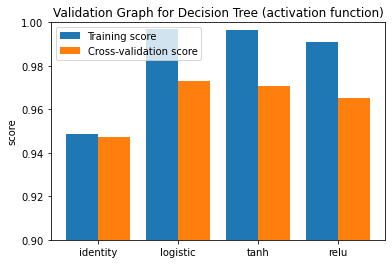

In [70]:
# Validation graph for activation (accuracy)

activation = ['identity', 'logistic', 'tanh', 'relu']
train_scores, test_scores = validation_curve(NN_classifier_4,X_train, y_train, 
                                             param_name="activation", param_range=activation, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['identity', 'logistic', 'tanh', 'relu']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('score')
plt.title('Validation Graph for Decision Tree (activation function)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

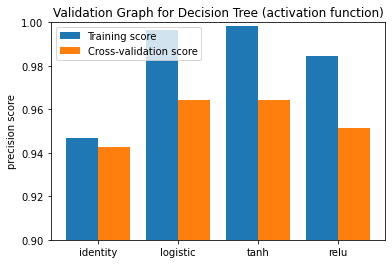

In [102]:
# Validation graph for activation (precision)
scorer = make_scorer(precision_score)
activation = ['identity', 'logistic', 'tanh', 'relu']
train_scores, test_scores = validation_curve(NN_classifier_4,X_train, y_train, 
                                             param_name="activation", param_range=activation, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['identity', 'logistic', 'tanh', 'relu']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('precision score')
plt.title('Validation Graph for Decision Tree (activation function)')
plt.show



## Neural Network Iteration Curve

Text(0.5, 1.0, 'Neural Network Iteration Curve')

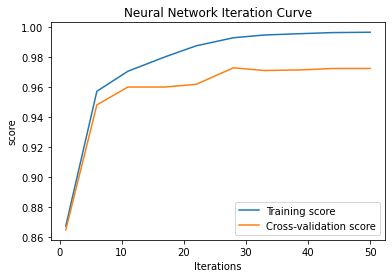

In [143]:
## Plot iterations for NN (accuracy)
range_list = np.linspace(1, 50, 10).astype('int32')
train_scores, test_scores  = validation_curve(
    NN_classifier_4, X_train, y_train, param_name="max_iter", param_range=range_list,
    cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel("score"); axs.set_xlabel("Iterations")
axs.set_title('Neural Network Iteration Curve')

Text(0.5, 1.0, 'Neural Network Iteration Curve')

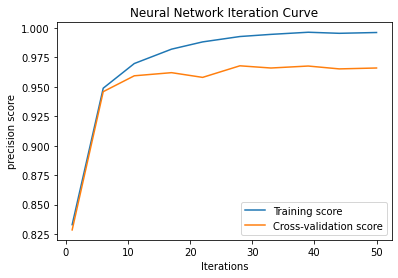

In [144]:
## Plot iterations for NN (precision)
scorer = make_scorer(precision_score, pos_label=1)
range_list = np.linspace(1, 50, 10).astype('int32')

train_scores, test_scores = validation_curve(
    NN_classifier_4, X_train, y_train, param_name="max_iter", param_range=range_list,
    scoring=scorer, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel("precision score"); axs.set_xlabel("Iterations")
axs.set_title('Neural Network Iteration Curve')

In [ ]:
## Plot iterations for NN (accuracy)
range_list = np.linspace(1, 100, 5).astype('int32')

train_scores, test_scores  = validation_curve(
    NN_classifier_4, X_train, y_train, param_name="max_iter", param_range=range_list,
    cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel("score"); axs.set_xlabel("Iterations")
axs.set_title('Neural Network Iteration Curve')

# Boosting

In [109]:
#start with the best case of DT
dummy_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=12, min_samples_leaf = 1, random_state = 7)
BST_classifier = AdaBoostClassifier(dummy_tree, random_state=7)
#GradientBoostingClassifier(random_state=7)
BST_classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                         random_state=7),
                   random_state=7)

In [110]:
#training accuracy & f1 & balanced accuracy & recall & precision
BST_train_predict = BST_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, BST_train_predict)
f1_train_predict = f1_score(y_train, BST_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, BST_train_predict)
recall_train_predict = recall_score(y_train, BST_train_predict)
precision_train_predict = precision_score(y_train, BST_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict, '\n')

print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())


Training set 
training accuracy 0.9967875172097292 
training f1 0.996787343993041 
balanced accuracy 0.9967909023049224 
recall score 0.9963570127504554 
precision score 0.9972652689152234 

Training f1_CV
[0.98623824 0.99082569 0.96787301 0.97247475 0.96788923 0.97705215
 0.97246779 0.98163747 0.9908226  0.96312659] 
 ave_f1_cv: 0.9770407519521882 

Training precision_CV
[0.98181818 1.         0.95575221 0.97272727 0.98130841 0.96460177
 0.96428571 0.96491228 0.98214286 0.95495495] 
 ave_precision_cv: 0.9722503655146573


In [150]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, BST_train_predict))
print(conf_matrix_train)

      0     1
0  1078     3
1     4  1094


In [151]:
#grid search
def BST_grid_search(X, y):
    param_grid = {'n_estimators': np.linspace(10,500,5).round().astype('int'), 
                 'learning_rate': [0.05, 0.1, 0.15, 0.2],
                 }
    
    base_estimator = AdaBoostClassifier(dummy_tree, random_state=7)
    BST_gs = GridSearchCV(base_estimator, param_grid, cv = 10)
    BST_gs.fit(X,y)

    return BST_gs

BSTres = BST_grid_search(X_train, y_train)
print('best parameters:', BSTres.best_params_, 'best score:', BSTres.best_score_)

best parameters: {'learning_rate': 0.1, 'n_estimators': 132} best score: 0.9802646598740118


In [68]:
#grid search
def BST_grid_search(X, y, verbose = 0):
    param_grid = {'n_estimators': np.linspace(10,200,3).round().astype('int'), 
                 'max_depth': list(range(1,20)),
                 'learning_rate': [.001,0.05, 0.1],
                 }
    
    base_estimator = GradientBoostingClassifier(random_state = 7)
    BST_gs = GridSearchCV(base_estimator, param_grid, cv = 10,
                        scoring="balanced_accuracy")#, 
                         #verbose = verbose, )
    BST_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return BST_gs

BSTres = BST_grid_search(X_train, y_train)
print('best parameters:', BSTres.best_params_, 'best score:', BSTres.best_score_)


best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200} best score: 0.9774370617489885


In [69]:
#grid search
def BST_grid_search(X, y, verbose = 0):
    param_grid = {'n_estimators': np.linspace(10,500,5).round().astype('int'), 
                 'max_depth': list(range(1,20)),
                 'learning_rate': [.001,0.05, 0.1, 0.15, 0.2],
                 }
    
    base_estimator = GradientBoostingClassifier(random_state = 7)
    BST_gs = GridSearchCV(base_estimator, param_grid, cv = 10,
                        scoring="balanced_accuracy")#, 
                         #verbose = verbose, )
    BST_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return BST_gs

BSTres = BST_grid_search(X_train, y_train)
print('best parameters:', BSTres.best_params_, 'best score:', BSTres.best_score_)


best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 132} best score: 0.9783377351496618


In [111]:
BST_classifier_1 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 200, random_state=7)
BST_classifier_1.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=200, random_state=7)

In [112]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier_1, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
BST_test_predict_1 = BST_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, BST_test_predict_1)
f1_test_predict = f1_score(y_test, BST_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, BST_test_predict_1)
recall_test_predict = recall_score(y_test, BST_test_predict_1)
precision_test_predict = precision_score(y_test, BST_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)



Cross Validation Score:
Training f1_CV
[0.99082492 0.99082492 0.96329966 0.96788383 0.96788923 0.97705215
 0.98164983 0.97704055 0.98623593 0.97234964] 
 ave_f1_cv: 0.9775050650182966 

Training precision_CV
[0.98198198 0.99090909 0.96363636 0.96396396 0.97247706 0.96460177
 0.98181818 0.95652174 0.98198198 0.97247706] 
 ave_precision_cv: 0.973036920177387 

Testing set 
testing accuracy 0.9669724770642202 
testing f1 0.9669322870317936 
balanced accuracy 0.9668257306157662 
recall score 0.9621212121212122 
precision score 0.9694656488549618


In [28]:
BST_classifier_2 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 132, random_state=7)
BST_classifier_2.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=132, random_state=7)

In [29]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier_2, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')


#testing accuracy & f1 & balanced accuracy & recall & precision
BST_test_predict_2 = BST_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, BST_test_predict_2)
f1_test_predict = f1_score(y_test, BST_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, BST_test_predict_2)
recall_test_predict = recall_score(y_test, BST_test_predict_2)
precision_test_predict = precision_score(y_test, BST_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.98623593 0.98623593 0.97247475 0.97247475 0.96788383 0.97705215
 0.98623824 0.99082492 0.9908226  0.97234964] 
 ave_f1_cv: 0.9802592720450907 

Training precision_CV
[0.97321429 0.98198198 0.97272727 0.97272727 0.96396396 0.96460177
 0.99082569 0.99090909 0.98214286 0.97247706] 
 ave_precision_cv: 0.9765571247371808 

Testing set 
testing accuracy 0.9651376146788991 
testing f1 0.9650807139653539 
balanced accuracy 0.9648172112584924 
recall score 0.9545454545454546 
precision score 0.972972972972973


In [115]:
BST_classifier_3 = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 132, random_state=7)
BST_classifier_3.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=132, random_state=7)

In [116]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier_3, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier_3, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')


#testing accuracy & f1 & balanced accuracy & recall & precision
BST_test_predict_3 = BST_classifier_3.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, BST_test_predict_3)
f1_test_predict = f1_score(y_test, BST_test_predict_3,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, BST_test_predict_3)
recall_test_predict = recall_score(y_test, BST_test_predict_3)
precision_test_predict = precision_score(y_test, BST_test_predict_3)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.95411299 0.95411299 0.94954022 0.93115645 0.92659933 0.9448799
 0.92659933 0.94035568 0.94953173 0.94930445] 
 ave_f1_cv: 0.9426193056458796 

Training precision_CV
[0.97142857 0.94642857 0.96261682 0.96116505 0.94339623 0.92241379
 0.94339623 0.96190476 0.97142857 0.94545455] 
 ave_precision_cv: 0.9529633138552255 

Testing set 
testing accuracy 0.9394495412844037 
testing f1 0.9394291487749432 
balanced accuracy 0.9397915992666883 
recall score 0.9507575757575758 
precision score 0.9261992619926199


In [30]:
best_accuracy[2] = accuracy_score(y_test, BST_test_predict_2)
best_f1[2] = f1_score(y_test, BST_test_predict_2)
best_precision[2] = precision_score(y_test, BST_test_predict_2)
print(best_accuracy, "\n",best_f1,"\n",best_precision)

[0.96697248 0.95963303 0.96513761 0.         0.        ] 
 [0.96551724 0.95801527 0.96367113 0.         0.        ] 
 [0.97674419 0.96538462 0.97297297 0.         0.        ]


## Boosting Learning Curve

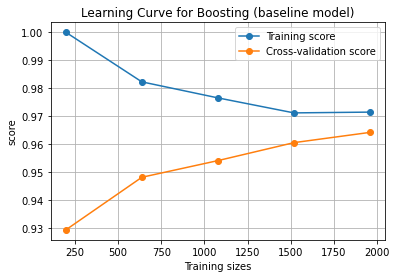

In [90]:
#Accuracy
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=BST_classifier, X=X_train, y=y_train,
                                                        train_sizes = train_sizes, cv=10, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Boosting (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

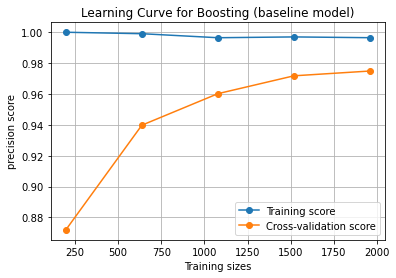

In [118]:
#precision
scorer = make_scorer(precision_score)
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=BST_classifier, X=X_train, y=y_train,scoring = scorer, 
                                                        train_sizes = train_sizes, cv=10, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Boosting (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

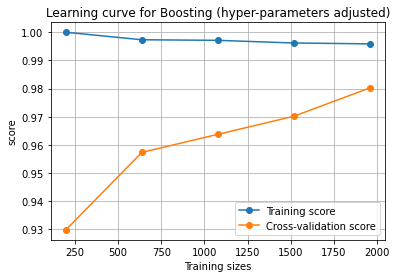

In [93]:
#Accuracy
BST_train_sizes = np.linspace(0.1, 1.0, 5)
BST_train_sizes, BST_train_scores, BST_test_scores = learning_curve(estimator=BST_classifier_2, X=X_train, y=y_train, 
                                              train_sizes = BST_train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(BST_train_sizes, np.mean(BST_train_scores, axis=1), 'o-', label='Training score')
plt.plot(BST_train_sizes, np.mean(BST_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for Boosting (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

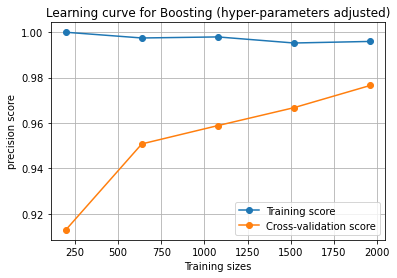

In [119]:
#precision
scorer = make_scorer(precision_score)
BST_train_sizes = np.linspace(0.1, 1.0, 5)
BST_train_sizes, BST_train_scores, BST_test_scores = learning_curve(estimator=BST_classifier_2, X=X_train, y=y_train,scoring = scorer, 
                                              train_sizes = BST_train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(BST_train_sizes, np.mean(BST_train_scores, axis=1), 'o-', label='Training score')
plt.plot(BST_train_sizes, np.mean(BST_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for Boosting (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Boosting Validation Curve

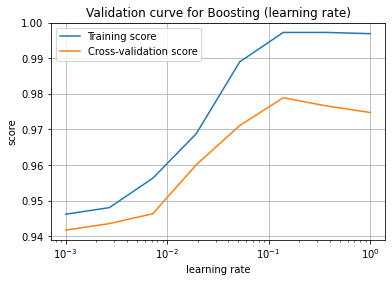

In [96]:
#Accuracy
param_range = np.logspace(-3, 0, 8)
train_scores, test_scores = validation_curve(BST_classifier_2, 
                                             X_train, y_train, 
                                             param_name="learning_rate", param_range=param_range, cv=5)

plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (learning rate)')
plt.xlabel('learning rate')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

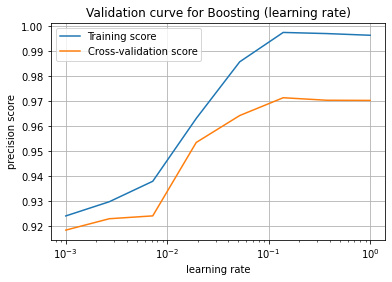

In [120]:
#precision
scorer = make_scorer(precision_score)
param_range = np.logspace(-3, 0, 8)
train_scores, test_scores = validation_curve(BST_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="learning_rate", param_range=param_range, cv=5)

plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (learning rate)')
plt.xlabel('learning rate')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this tra

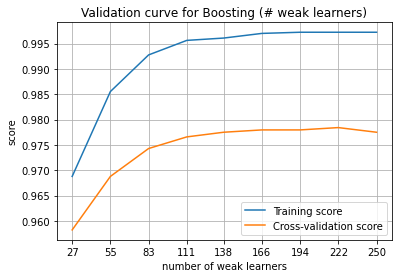

In [98]:
#Accuracy
param_range = np.linspace(0, 250, 10).astype('int32') 
#param_range =  np.linspace(0, 10, 5) + 1
train_scores, test_scores = validation_curve(BST_classifier_2, 
                                             X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (# weak learners)')
plt.xlabel('number of weak learners')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this tra

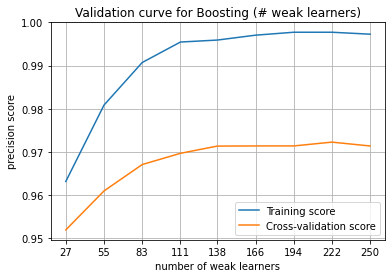

In [121]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(0, 250, 10).astype('int32') 
#param_range =  np.linspace(0, 10, 5) + 1
train_scores, test_scores = validation_curve(BST_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="n_estimators", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (# weak learners)')
plt.xlabel('number of weak learners')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

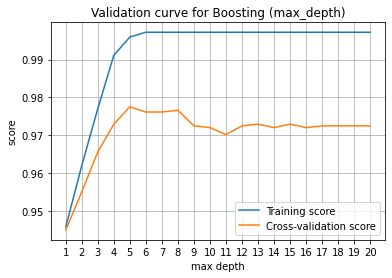

In [100]:
# Accuracy
param_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(BST_classifier_2, 
                                             X_train, y_train, 
                                             param_name="max_depth", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (max_depth)')
plt.xlabel('max depth')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

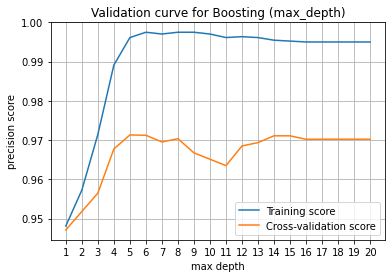

In [122]:
#precision 
scorer = make_scorer(precision_score)
param_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(BST_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="max_depth", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (max_depth)')
plt.xlabel('max depth')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Support Vector Machine

In [123]:
SVM_classifier = SVC(random_state=7)
SVM_classifier.fit(X_train,y_train)

SVC(random_state=7)

In [124]:
#training accuracy & f1 & balanced accuracy & recall & precision
SVM_train_predict = SVM_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, SVM_train_predict)
f1_train_predict = f1_score(y_train, SVM_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, SVM_train_predict)
recall_train_predict = recall_score(y_train, SVM_train_predict)
precision_train_predict = precision_score(y_train, SVM_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict,'\n')

print("Training f1_CV")
CVscores_train = cross_val_score(SVM_classifier, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(SVM_classifier, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())

Training set 
training accuracy 0.968793024323084 
training f1 0.9687849708099072 
balanced accuracy 0.9687266731707975 
recall score 0.9772313296903461 
precision score 0.9614695340501792 

Training f1_CV
[0.9494892  0.96327493 0.96788383 0.95412844 0.96329966 0.94472617
 0.93577441 0.96329039 0.97247475 0.96773097] 
 ave_f1_cv: 0.9582072756105673 

Training precision_CV
[0.92241379 0.94736842 0.96396396 0.96296296 0.96363636 0.90163934
 0.93636364 0.95535714 0.97272727 0.95535714] 
 ave_precision_cv: 0.9481790043786861


In [104]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, SVM_train_predict))
print(conf_matrix_train)

      0     1
0  1038    43
1    25  1073


In [81]:
#grid search
def SVM_grid_search(X, y, verbose = 0):
    param_grid = {'kernel': ['linear', 'poly', 'rbf'], 
                  'gamma':[0.25/X_train.shape[1], 0.5/X_train.shape[1], 0.75/X_train.shape[1]], 
                  'C': [1.0, 3.0, 5.0, 10.0, 100.0]
                 }
    
    base_estimator = SVC(random_state = 7)
    SVM_gs = GridSearchCV(base_estimator, param_grid, cv = 5,
                        scoring="balanced_accuracy")#, 
                         #verbose = verbose, )
    SVM_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return SVM_gs

SVMres = SVM_grid_search(X_train, y_train)
print('best parameters:', SVMres.best_params_, 'best score:', SVMres.best_score_)


best parameters: {'C': 100.0, 'gamma': 0.016666666666666666, 'kernel': 'poly'} best score: 0.9696975483641413


In [82]:
#grid search
def SVM_grid_search(X, y, verbose = 0):
    param_grid = {'kernel': ['linear', 'poly', 'rbf'], 
                  'gamma':[0.1, 0.15, 0.2, 0.25], 
                  'C': [10.0, 50.0, 80.0, 100.0, 150.0, 200.0]
                 }
    
    base_estimator = SVC(random_state = 7)
    SVM_gs = GridSearchCV(base_estimator, param_grid, cv = 5,
                        scoring="balanced_accuracy")#, 
                         #verbose = verbose, )
    SVM_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return SVM_gs

SVMres = SVM_grid_search(X_train, y_train)
print('best parameters:', SVMres.best_params_, 'best score:', SVMres.best_score_)


best parameters: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'} best score: 0.9697228003580192


In [72]:
#grid search
def SVM_grid_search(X, y, verbose = 0):
    param_grid = {'kernel': ['linear', 'poly', 'rbf'], 
                  'gamma':[0.0001, 0.005, 0.01, 0.015, 0.02], 
                  'C': [5.0, 10.0, 50.0, 100.0, 150.0],
                  'max_iter':[300, 500, 1000]
                 }
    
    base_estimator = SVC(random_state = 7)
    SVM_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    SVM_gs.fit(X,y)

    return SVM_gs

SVMres = SVM_grid_search(X_train, y_train)
print('best parameters:', SVMres.best_params_, 'best score:', SVMres.best_score_)


D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.w

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.w

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


best parameters: {'C': 150.0, 'gamma': 0.015, 'kernel': 'rbf', 'max_iter': 1000} best score: 0.9637467046293366


D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [125]:
SVM_classifier_1 = SVC(C = 100, kernel = 'poly', gamma = 0.01, random_state=7)
SVM_classifier_1.fit(X_train,y_train)

SVC(C=100, gamma=0.01, kernel='poly', random_state=7)

In [126]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(SVM_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(SVM_classifier_1, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
SVM_test_predict_1 = SVM_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, SVM_test_predict_1)
f1_test_predict = f1_score(y_test, SVM_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, SVM_test_predict_1)
recall_test_predict = recall_score(y_test, SVM_test_predict_1)
precision_test_predict = precision_score(y_test, SVM_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.96329966 0.97705215 0.96788923 0.94954022 0.95412844 0.95864511
 0.92659933 0.95869387 0.96788923 0.9677392 ] 
 ave_f1_cv: 0.9591476439812852 

Training precision_CV
[0.95495495 0.96460177 0.97247706 0.96261682 0.96296296 0.93162393
 0.94339623 0.94690265 0.98130841 0.96363636] 
 ave_precision_cv: 0.9584481162237111 

Testing set 
testing accuracy 0.9577981651376147 
testing f1 0.9577776954402606 
balanced accuracy 0.9580435134260757 
recall score 0.9659090909090909 
precision score 0.9479553903345725


In [31]:
SVM_classifier_2 = SVC(C = 10, kernel = 'rbf', gamma = 0.1, random_state=7)
SVM_classifier_2.fit(X_train,y_train)

SVC(C=10, gamma=0.1, random_state=7)

In [32]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(SVM_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(SVM_classifier_2, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
SVM_test_predict_2 = SVM_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, SVM_test_predict_2)
f1_test_predict = f1_score(y_test, SVM_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, SVM_test_predict_2)
recall_test_predict = recall_score(y_test, SVM_test_predict_2)
precision_test_predict = precision_score(y_test, SVM_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.97705988 0.98623593 0.97247475 0.97246779 0.97246779 0.96787301
 0.96788923 0.97704055 0.97706374 0.97234494] 
 ave_f1_cv: 0.9742917609021131 

Training precision_CV
[0.96428571 0.98198198 0.97272727 0.96428571 0.96428571 0.95575221
 0.97247706 0.95652174 0.98165138 0.96396396] 
 ave_precision_cv: 0.9677932753417151 

Testing set 
testing accuracy 0.9614678899082569 
testing f1 0.9613659149138707 
balanced accuracy 0.9608001725439448 
recall score 0.9393939393939394 
precision score 0.9802371541501976


In [129]:
SVM_classifier_3 = SVC(C = 150, kernel = 'rbf', gamma = 0.015, max_iter = 1000, random_state=7)
SVM_classifier_3.fit(X_train,y_train)

D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=150, gamma=0.015, max_iter=1000, random_state=7)

In [130]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(SVM_classifier_3, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(SVM_classifier_3, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
SVM_test_predict_3 = SVM_classifier_3.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, SVM_test_predict_3)
f1_test_predict = f1_score(y_test, SVM_test_predict_3,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, SVM_test_predict_3)
recall_test_predict = recall_score(y_test, SVM_test_predict_3)
precision_test_predict = precision_score(y_test, SVM_test_predict_3)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

[0.9724562  0.9724562  0.95411299 0.95869387 0.94954022 0.95403171
 0.95412458 0.96329039 0.97705988 0.95389257] 
 ave_f1_cv: 0.9609658614153791 

Training precision_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

[0.94782609 0.95614035 0.94642857 0.94690265 0.95412844 0.92372881
 0.95454545 0.95535714 0.97297297 0.9380531 ] 
 ave_precision_cv: 0.949608358577654 

Testing set 
testing accuracy 0.9577981651376147 
testing f1 0.9577702987241813 
balanced accuracy 0.9579289334627413 
recall score 0.9621212121212122 
precision score 0.951310861423221


D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [33]:
best_accuracy[3] = accuracy_score(y_test, SVM_test_predict_2)
best_f1[3] = f1_score(y_test, SVM_test_predict_2)
best_precision[3] = precision_score(y_test, SVM_test_predict_2)
print(best_accuracy, "\n",best_f1, "\n",best_precision)

[0.96697248 0.95963303 0.96513761 0.96146789 0.        ] 
 [0.96551724 0.95801527 0.96367113 0.95938104 0.        ] 
 [0.97674419 0.96538462 0.97297297 0.98023715 0.        ]


## SVM Learning Curve

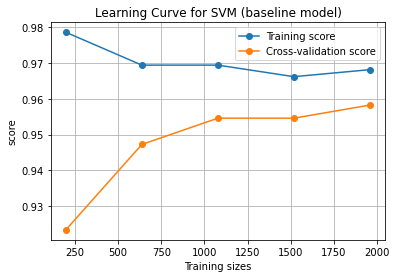

In [97]:
#Accuracy
train_sizes, train_scores, test_scores = learning_curve(estimator=SVM_classifier, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

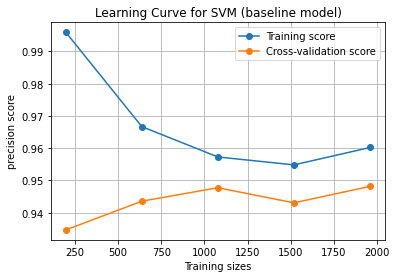

In [132]:
#precision
scorer = make_scorer(precision_score)
train_sizes, train_scores, test_scores = learning_curve(estimator=SVM_classifier, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

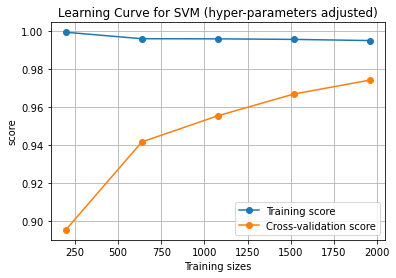

In [125]:
SVM_train_sizes = np.linspace(0.1, 1.0, 5)
SVM_train_sizes, SVM_train_scores, SVM_test_scores = learning_curve(estimator=SVM_classifier_2, X=X_train, y=y_train, 
                                              train_sizes = SVM_train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(SVM_train_sizes, np.mean(SVM_train_scores, axis=1), 'o-', label='Training score')
plt.plot(SVM_train_sizes, np.mean(SVM_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

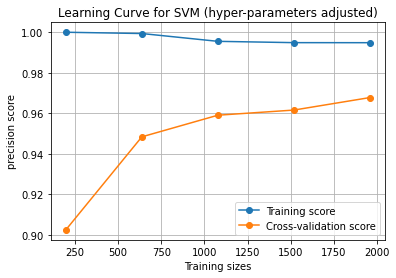

In [133]:
#precision
scorer = make_scorer(precision_score)
SVM_train_sizes = np.linspace(0.1, 1.0, 5)
SVM_train_sizes, SVM_train_scores, SVM_test_scores = learning_curve(estimator=SVM_classifier_2, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = SVM_train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(SVM_train_sizes, np.mean(SVM_train_scores, axis=1), 'o-', label='Training score')
plt.plot(SVM_train_sizes, np.mean(SVM_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## SVM Validation Curve

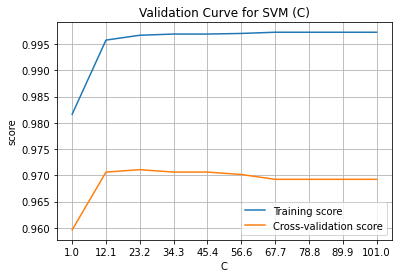

In [38]:
#Accuracy
param_range = np.linspace(0, 100, 10) +1
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train, 
                                             param_name="C", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (C)')
plt.xlabel('C')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

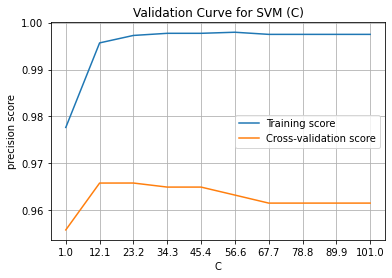

In [134]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(0, 100, 10) +1
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train,scoring = scorer, 
                                             param_name="C", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (C)')
plt.xlabel('C')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

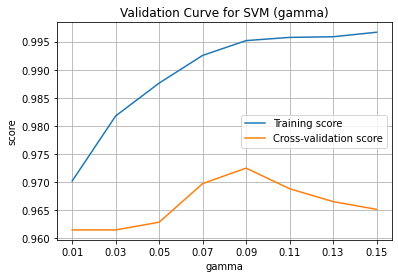

In [40]:
#Accuracy
param_range = np.linspace(0.01, 0.15, 8) 
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train, 
                                             param_name="gamma", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (gamma)')
plt.xlabel('gamma')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

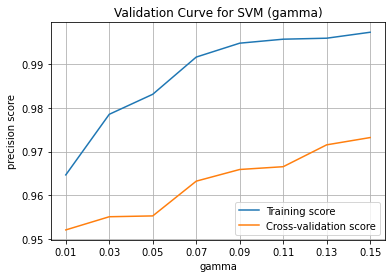

In [135]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(0.01, 0.15, 8) 
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="gamma", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (gamma)')
plt.xlabel('gamma')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

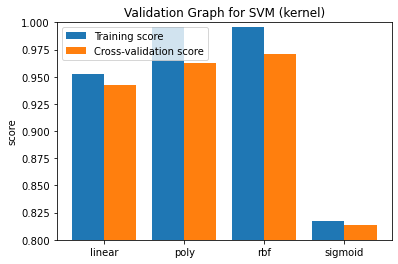

In [51]:
# Validation graph for kernel (accuracy)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(SVM_classifier_2,X_train, y_train, 
                                             param_name="kernel", param_range=kernel, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['linear', 'poly', 'rbf', 'sigmoid']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.8, 1.0))
plt.ylabel('score')
plt.title('Validation Graph for SVM (kernel)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

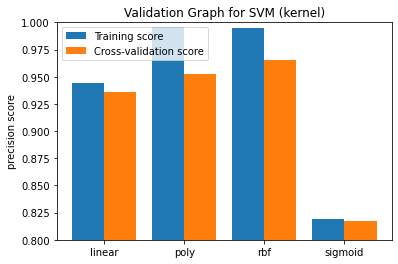

In [136]:
# Validation graph for kernel (precision)
scorer = make_scorer(precision_score)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(SVM_classifier_2,X_train, y_train, 
                                             param_name="kernel", param_range=kernel, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['linear', 'poly', 'rbf', 'sigmoid']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.8, 1.0))
plt.ylabel('precision score')
plt.title('Validation Graph for SVM (kernel)')
plt.show



## SVM Iteration Curve

Text(0.5, 1.0, 'SVM Iteration Curve')

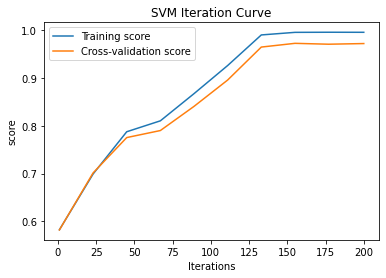

In [139]:
## Plot iterations for SVM
range_list = np.linspace(1, 200, 10).astype('int32')

train_scores, test_scores = validation_curve(
    SVM_classifier_2, X_train, y_train, param_name="max_iter", param_range=range_list,
    cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel("score"); axs.set_xlabel("Iterations")
axs.set_title('SVM Iteration Curve')

Text(0.5, 1.0, 'SVM Iteration Curve')

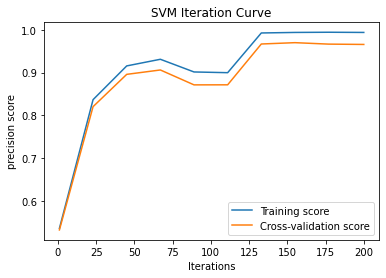

In [140]:
## Plot iterations for SVM
scorer = make_scorer(precision_score, pos_label=1)
range_list = np.linspace(1, 200, 10).astype('int32')

train_scores, test_scores = validation_curve(
    SVM_classifier_2, X_train, y_train, param_name="max_iter", param_range=range_list,
    scoring=scorer, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel("precision score"); axs.set_xlabel("Iterations")
axs.set_title('SVM Iteration Curve')

# KNN

In [145]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [146]:
#training accuracy & f1 & balanced accuracy & recall & precision
KNN_train_predict = KNN_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, KNN_train_predict)
f1_train_predict = f1_score(y_train, KNN_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, KNN_train_predict)
recall_train_predict = recall_score(y_train, KNN_train_predict)
precision_train_predict = precision_score(y_train, KNN_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict,'\n')

print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())


Training set 
training accuracy 0.9614502065167508 
training f1 0.9614256305985058 
balanced accuracy 0.9613117955613519 
recall score 0.9790528233151184 
precision score 0.9463028169014085 

Training f1_CV
[0.94954022 0.94941248 0.92645074 0.93115645 0.92200358 0.91708925
 0.90822598 0.95870778 0.94493559 0.91237541] 
 ave_f1_cv: 0.9319897477756379 

Training precision_CV
[0.9537037  0.91596639 0.89830508 0.92035398 0.91891892 0.87704918
 0.90178571 0.95495495 0.9375     0.89473684] 
 ave_precision_cv: 0.9173274767897694


In [119]:
KNNconf_matrix_train = pd.DataFrame(confusion_matrix(y_train, KNN_train_predict))
print(KNNconf_matrix_train)

      0     1
0  1020    61
1    23  1075


In [118]:
#grid search
def KNN_grid_search(X, y, verbose = 0):
    param_grid = {'n_neighbors': np.linspace(1,20,20).astype('int32'), 
                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 
                  'leaf_size': np.linspace(5,50,10).astype('int32')
                 }
    
    base_estimator = KNeighborsClassifier()
    KNN_gs = GridSearchCV(base_estimator, param_grid, cv = 5,
                        scoring="balanced_accuracy")#, 
                         #verbose = verbose, )
    KNN_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return KNN_gs

KNNres = KNN_grid_search(X_train, y_train)
print('best parameters:', KNNres.best_params_, 'best score:', KNNres.best_score_)


best parameters: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1} best score: 0.9609623075652681


In [119]:
#grid search
def KNN_grid_search(X, y, verbose = 0):
    param_grid = {'n_neighbors': np.linspace(1,20,20).astype('int32'), 
                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 
                  'leaf_size': np.linspace(1,15,15).astype('int32')
                 }
    
    base_estimator = KNeighborsClassifier()
    KNN_gs = GridSearchCV(base_estimator, param_grid, cv = 5,
                        scoring="balanced_accuracy")#, 
                         #verbose = verbose, )
    KNN_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return KNN_gs

KNNres = KNN_grid_search(X_train, y_train)
print('best parameters:', KNNres.best_params_, 'best score:', KNNres.best_score_)


best parameters: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1} best score: 0.9609623075652681


In [120]:
#grid search
def KNN_grid_search(X, y):
    param_grid = {'n_neighbors': np.linspace(1,20,20).astype('int32'), 
                  'weights':['uniform', 'distance']
                 }
    
    base_estimator = KNeighborsClassifier()
    KNN_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    KNN_gs.fit(X,y)

    return KNN_gs

KNNres = KNN_grid_search(X_train, y_train)
print('best parameters:', KNNres.best_params_, 'best score:', KNNres.best_score_)


best parameters: {'n_neighbors': 8, 'weights': 'distance'} best score: 0.9683349151112516


In [147]:
KNN_classifier_1 = KNeighborsClassifier(n_neighbors = 1, algorithm = 'ball_tree', leaf_size = 5)
KNN_classifier_1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=1)

In [148]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier_1, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
KNN_test_predict_1 = KNN_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, KNN_test_predict_1)
f1_test_predict = f1_score(y_test, KNN_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, KNN_test_predict_1)
recall_test_predict = recall_score(y_test, KNN_test_predict_1)
precision_test_predict = precision_score(y_test, KNN_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.95869387 0.97706374 0.9449124  0.9724562  0.95412844 0.96329039
 0.94033559 0.9449124  0.96325327 0.94008708] 
 ave_f1_cv: 0.9559133364150588 

Training precision_CV
[0.93859649 0.98165138 0.92982456 0.95614035 0.96296296 0.95535714
 0.92920354 0.92982456 0.93965517 0.93636364] 
 ave_precision_cv: 0.9459579795479612 

Testing set 
testing accuracy 0.9669724770642202 
testing f1 0.9669028340080972 
balanced accuracy 0.9664819907257629 
recall score 0.9507575757575758 
precision score 0.98046875


In [149]:
KNN_classifier_2 = KNeighborsClassifier(n_neighbors = 1, algorithm = 'ball_tree', leaf_size = 1)
KNN_classifier_2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=1)

In [150]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier_2, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
KNN_test_predict_2 = KNN_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, KNN_test_predict_2)
f1_test_predict = f1_score(y_test, KNN_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, KNN_test_predict_2)
recall_test_predict = recall_score(y_test, KNN_test_predict_2)
precision_test_predict = precision_score(y_test, KNN_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.95869387 0.97706374 0.9449124  0.9724562  0.95412844 0.96329039
 0.94033559 0.9449124  0.96325327 0.94008708] 
 ave_f1_cv: 0.9559133364150588 

Training precision_CV
[0.93859649 0.98165138 0.92982456 0.95614035 0.96296296 0.95535714
 0.92920354 0.92982456 0.93965517 0.93636364] 
 ave_precision_cv: 0.9459579795479612 

Testing set 
testing accuracy 0.9669724770642202 
testing f1 0.9669028340080972 
balanced accuracy 0.9664819907257629 
recall score 0.9507575757575758 
precision score 0.98046875


In [151]:
KNN_classifier_3 = KNeighborsClassifier(n_neighbors = 8, weights = 'distance')
KNN_classifier_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [152]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier_3, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier_3, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
KNN_test_predict_3 = KNN_classifier_3.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, KNN_test_predict_3)
f1_test_predict = f1_score(y_test, KNN_test_predict_3,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, KNN_test_predict_3)
recall_test_predict = recall_score(y_test, KNN_test_predict_3)
precision_test_predict = precision_score(y_test, KNN_test_predict_3)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.96327493 0.9816452  0.93558463 0.98623129 0.96330275 0.9724562
 0.94030542 0.97243995 0.98163747 0.96311406] 
 ave_f1_cv: 0.9659991902013697 

Training precision_CV
[0.93913043 0.97321429 0.9        0.97345133 0.97222222 0.95614035
 0.92173913 0.94827586 0.96491228 0.94690265] 
 ave_precision_cv: 0.9495988549102699 

Testing set 
testing accuracy 0.9504587155963303 
testing f1 0.9504046160949913 
balanced accuracy 0.9503531758869838 
recall score 0.946969696969697 
precision score 0.9505703422053232


In [34]:
KNN_classifier_4 = KNeighborsClassifier(n_neighbors = 13, weights = 'distance')
KNN_classifier_4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [35]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier_4, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier_4, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
KNN_test_predict_4 = KNN_classifier_4.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, KNN_test_predict_4)
f1_test_predict = f1_score(y_test, KNN_test_predict_4,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, KNN_test_predict_4)
recall_test_predict = recall_score(y_test, KNN_test_predict_4)
precision_test_predict = precision_score(y_test, KNN_test_predict_4)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.97246779 0.98164983 0.95867299 0.97705215 0.96788923 0.95864511
 0.9494892  0.96785677 0.98623129 0.95389257] 
 ave_f1_cv: 0.9673846936814051 

Training precision_CV
[0.95575221 0.98181818 0.93913043 0.96460177 0.97247706 0.93162393
 0.93043478 0.94782609 0.97345133 0.9380531 ] 
 ave_precision_cv: 0.9535168889089769 

Testing set 
testing accuracy 0.9541284403669725 
testing f1 0.954078348236103 
balanced accuracy 0.9540264747115281 
recall score 0.9507575757575758 
precision score 0.9543726235741445


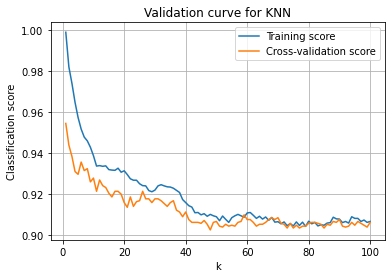

In [110]:
# manually select best hyper parameters
k_range = np.arange(1, 101)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", 
                                             param_range=k_range, cv=5)

plt.figure()
plt.plot(k_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for KNN')
plt.xlabel('k')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

In [134]:
# select k with best cv score
k_optimal = np.argmax(np.mean(test_scores, axis=1)) + 1
print('Optimal value of k: %d' % k_optimal)
best_clf_knn = KNeighborsClassifier(n_neighbors=k_optimal)
best_clf_knn.fit(X_train, y_train)
y_pred = best_clf_knn.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of kNN with k = %d is %.2f%%' % (k_optimal, best_accuracy * 100))

Optimal value of k: 1
Accuracy of kNN with k = 1 is 96.70%


In [36]:
best_accuracy[4] = accuracy_score(y_test, KNN_test_predict_4)
best_f1[4] = f1_score(y_test, KNN_test_predict_4)
best_precision[4] = precision_score(y_test, KNN_test_predict_4)
print(best_accuracy, "\n",best_f1, "\n",best_precision)

[0.96697248 0.95963303 0.96513761 0.96146789 0.95412844] 
 [0.96551724 0.95801527 0.96367113 0.95938104 0.95256167] 
 [0.97674419 0.96538462 0.97297297 0.98023715 0.95437262]


## KNN Learning curve

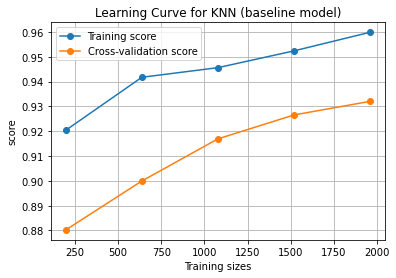

In [111]:
#Accuracy
train_sizes, train_scores, test_scores = learning_curve(estimator=KNN_classifier, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for KNN (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

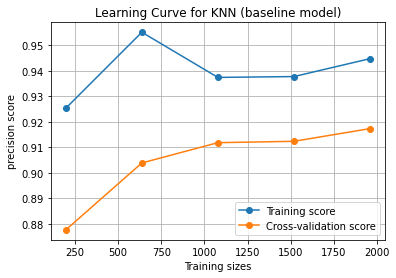

In [156]:
#precision
scorer = make_scorer(precision_score)
train_sizes, train_scores, test_scores = learning_curve(estimator=KNN_classifier, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for KNN (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

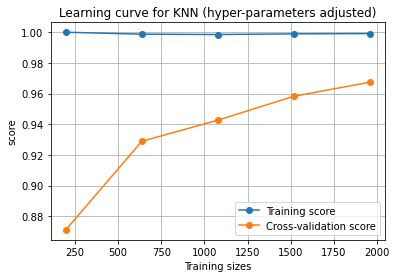

In [44]:
#Accuracy
KNN_train_sizes = np.linspace(0.1, 1.0, 5)
KNN_train_sizes, KNN_train_scores, KNN_test_scores = learning_curve(estimator=KNN_classifier_4, X=X_train, y=y_train, 
                                              train_sizes = KNN_train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(KNN_train_sizes, np.mean(KNN_train_scores, axis=1), 'o-', label='Training score')
plt.plot(KNN_train_sizes, np.mean(KNN_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for KNN (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

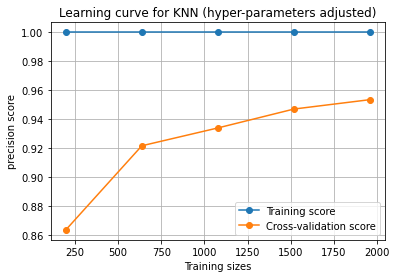

In [157]:
#precision
scorer = make_scorer(precision_score)
KNN_train_sizes = np.linspace(0.1, 1.0, 5)
KNN_train_sizes, KNN_train_scores, KNN_test_scores = learning_curve(estimator=KNN_classifier_4, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = KNN_train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(KNN_train_sizes, np.mean(KNN_train_scores, axis=1), 'o-', label='Training score')
plt.plot(KNN_train_sizes, np.mean(KNN_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for KNN (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## KNN Validation Curve

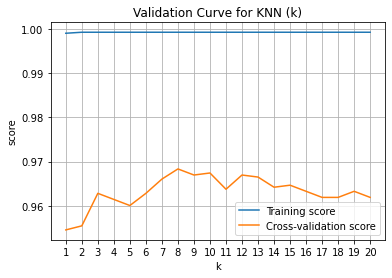

In [46]:
#Accuracy
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_4, 
                                             X_train, y_train, 
                                             param_name="n_neighbors", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (k)')
plt.xlabel('k')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

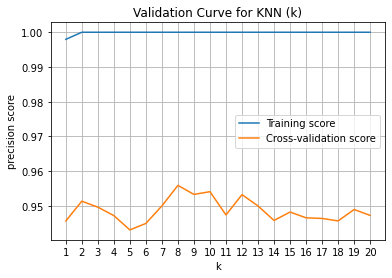

In [158]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_4, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="n_neighbors", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (k)')
plt.xlabel('k')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

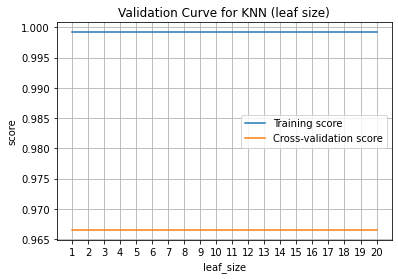

In [48]:
#Accuracy
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_4, 
                                             X_train, y_train, 
                                             param_name="leaf_size", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (leaf size)')
plt.xlabel('leaf_size')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

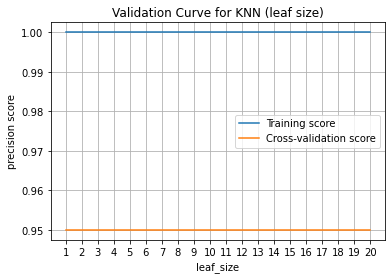

In [159]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_4, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="leaf_size", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (leaf size)')
plt.xlabel('leaf_size')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

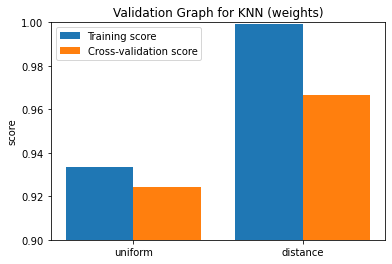

In [50]:
# Validation graph for KNN (weights)
weights = ['uniform', 'distance']
train_scores, test_scores = validation_curve(KNN_classifier_4,X_train, y_train, 
                                             param_name="weights", param_range=weights, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

x = ['uniform', 'distance']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('score')
plt.title('Validation Graph for KNN (weights)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

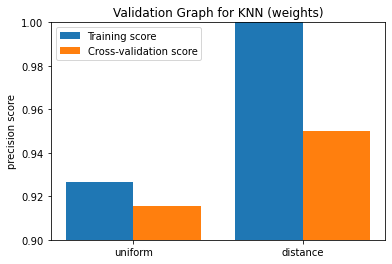

In [160]:
# precision 
scorer = make_scorer(precision_score)
weights = ['uniform', 'distance']
train_scores, test_scores = validation_curve(KNN_classifier_4,X_train, y_train, 
                                             param_name="weights", param_range=weights, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

x = ['uniform', 'distance']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('precision score')
plt.title('Validation Graph for KNN (weights)')
plt.show



# Algorithms Comparison

In [31]:
def plot_timing_curves(estimators, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), random_state =7):

    ax = plt.subplot()
    ax.grid()
    
    for estimator, name in estimators:
        print(name)
        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, random_state= random_state)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)
        
        ax.semilogy(train_sizes, fit_times_mean, 'o-', label = name)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Fit times (s)")
        ax.legend(loc="best")

    plt.grid(True)
    return plt

In [32]:
classifiers = [(DT_classifier_1, "Decision Tree"),
               (NN_classifier_4, "Neural Network"),
               (BST_classifier_2, "Boosting"),
               (SVM_classifier_2, "SVM"),
               (KNN_classifier_4, "KNN"),
               ]

Decision Tree
Neural Network
Boosting
SVM
KNN


<module 'matplotlib.pyplot' from 'D:\\Program Files\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

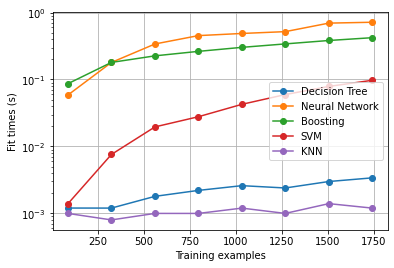

In [33]:
plot_timing_curves(classifiers
, X_train, y_train, "Fit Times vs Training Size")

In [34]:
import time

test_times = []
for classifier, name in classifiers:
    start_time1 = time.time()
    classifier.fit(X_train, y_train)
    end_time1 = time.time()
    start_time2 = time.time()
    classifier.predict(X_test)
    end_time2 = time.time()
    test_times.append((name, (end_time1-start_time1),end_time2-start_time2))
    
test_times

[('Decision Tree', 0.003987312316894531, 0.0),
 ('Neural Network', 0.7475693225860596, 0.00099945068359375),
 ('Boosting', 0.4957296848297119, 0.0029985904693603516),
 ('SVM', 0.14291906356811523, 0.05396890640258789),
 ('KNN', 0.0010004043579101562, 0.02696967124938965)]

In [37]:
classifiers = ('Decision\nTree', 'Neural\nNetwork', 'Boosting', 'SVM', 'KNN')
x_pos = np.arange(len(classifiers))

<function matplotlib.pyplot.show(close=None, block=None)>

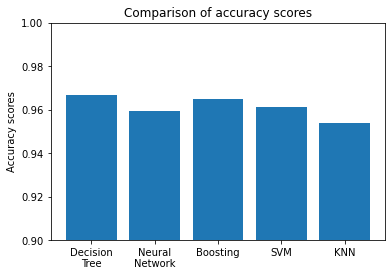

In [39]:
plt.bar(x_pos, height = best_accuracy)
plt.xticks(x_pos, classifiers)
plt.ylim((0.9, 1.0))
plt.ylabel('Accuracy scores')
plt.title('Comparison of accuracy scores')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

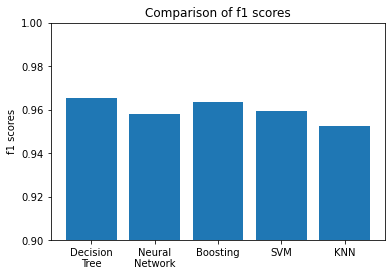

In [40]:
plt.bar(x_pos, height = best_f1)
plt.xticks(x_pos, classifiers)
plt.ylim((0.9, 1.0))
plt.ylabel('f1 scores')
plt.title('Comparison of f1 scores')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

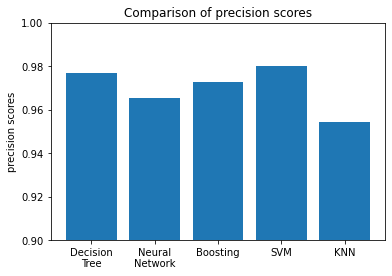

In [41]:
plt.bar(x_pos, height = best_precision)
plt.xticks(x_pos, classifiers)
plt.ylim((0.9, 1.0))
plt.ylabel('precision scores')
plt.title('Comparison of precision scores')
plt.show